<a href="https://colab.research.google.com/github/ruchithareddy269/DM--Assignment-5/blob/main/6_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

**EDA-Load the Data**

In [6]:
import pandas as pd

# Load the datasets
base_path = '/content/drive/MyDrive/dm-assignment-5/'

node_file_name = 'stack_network_nodes.csv'
nodes_data = pd.read_csv(base_path+node_file_name)

links_file_name = 'stack_network_links.csv'
links_data = pd.read_csv(base_path+links_file_name)

# Display the first few rows of each dataset
(nodes_data.head(), links_data.head())


(        name  group  nodesize
 0       html      6    272.45
 1        css      6    341.17
 2  hibernate      8     29.83
 3     spring      8     52.84
 4       ruby      3     70.14,
              source target      value
 0             azure   .net  20.933192
 1        sql-server   .net  32.322524
 2           asp.net   .net  48.407030
 3  entity-framework   .net  24.370903
 4               wpf   .net  32.350925)

**Data Visualizations**

In [8]:
# Basic information about the datasets including data types
nodes_info = nodes_data.info()
links_info = links_data.info()

# Basic statistical summaries of the datasets
nodes_description = nodes_data.describe()
links_description = links_data.describe()

(nodes_info, links_info, nodes_description, links_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      115 non-null    object 
 1   group     115 non-null    int64  
 2   nodesize  115 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  490 non-null    object 
 1   target  490 non-null    object 
 2   value   490 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.6+ KB


(None,
 None,
             group    nodesize
 count  115.000000  115.000000
 mean     5.469565   61.186174
 std      3.282922  110.511259
 min      1.000000    8.250000
 25%      3.000000   11.510000
 50%      5.000000   18.790000
 75%      8.000000   48.980000
 max     14.000000  649.160000,
             value
 count  490.000000
 mean    34.968177
 std     16.535294
 min     20.021933
 25%     23.782470
 50%     28.535748
 75%     42.336643
 max    126.571127)

**Data Information**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicate rows
duplicate_rows_nodes = nodes_data.duplicated().sum()
duplicate_rows_links = links_data.duplicated().sum()

**Data Visualization**

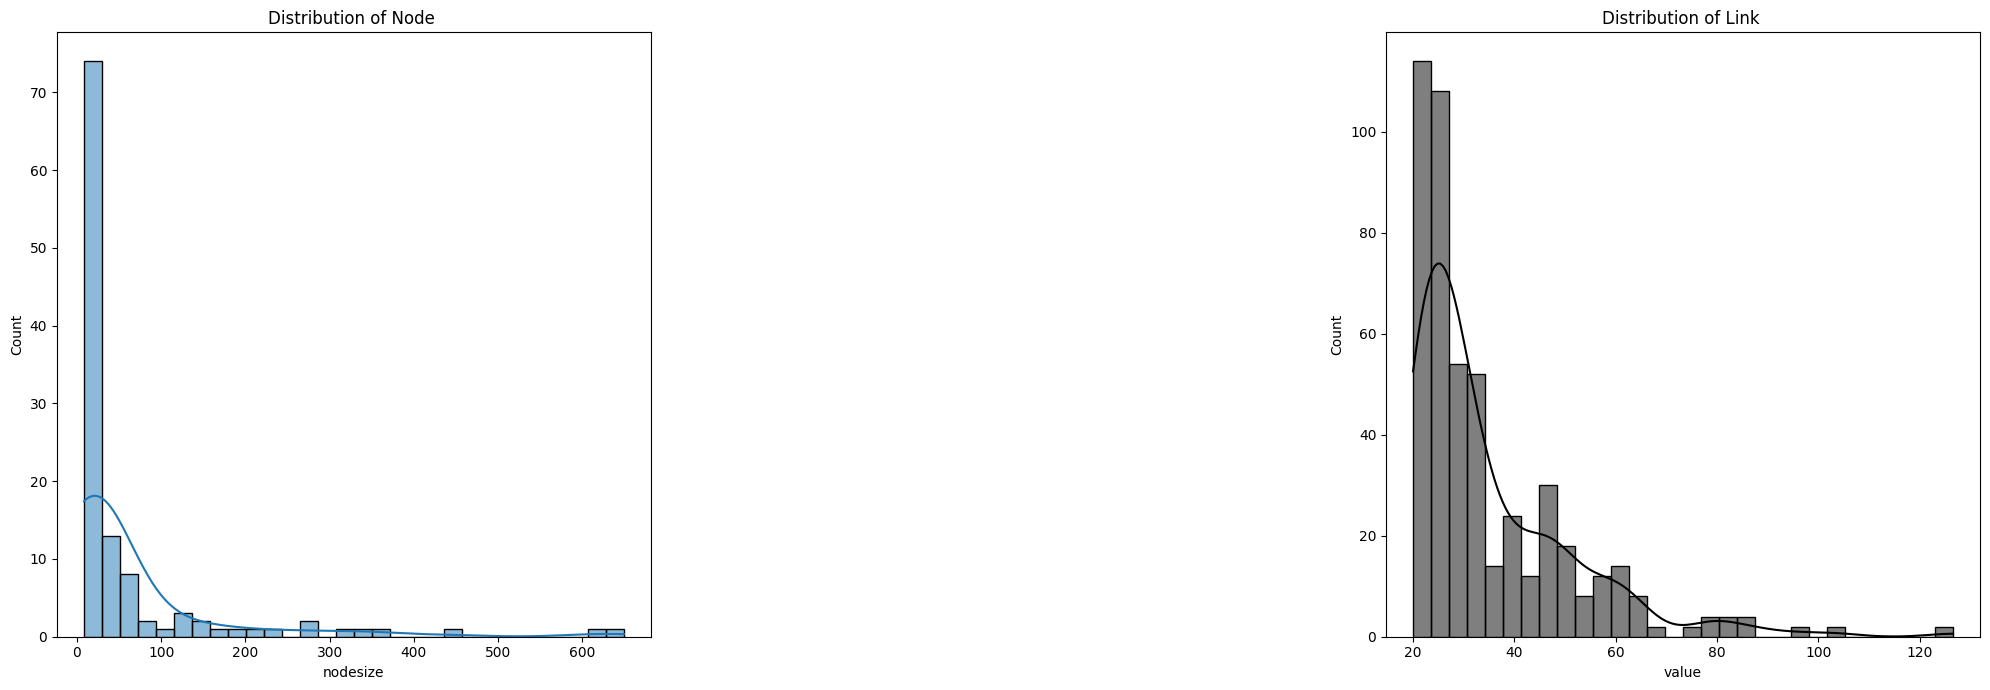

In [18]:


# Visualizations
plt.figure(figsize=(20, 7))

# Histogram for 'nodesize' distribution
plt.subplot(1, 3, 1)
sns.histplot(nodes_data['nodesize'], kde=True, bins=30)
plt.title('Distribution of Node ')

# Histogram for 'value' distribution in links
plt.subplot(1, 3, 3)
sns.histplot(links_data['value'], kde=True, color="black", bins=30)
plt.title('Distribution of Link ')

plt.tight_layout()
plt.show()

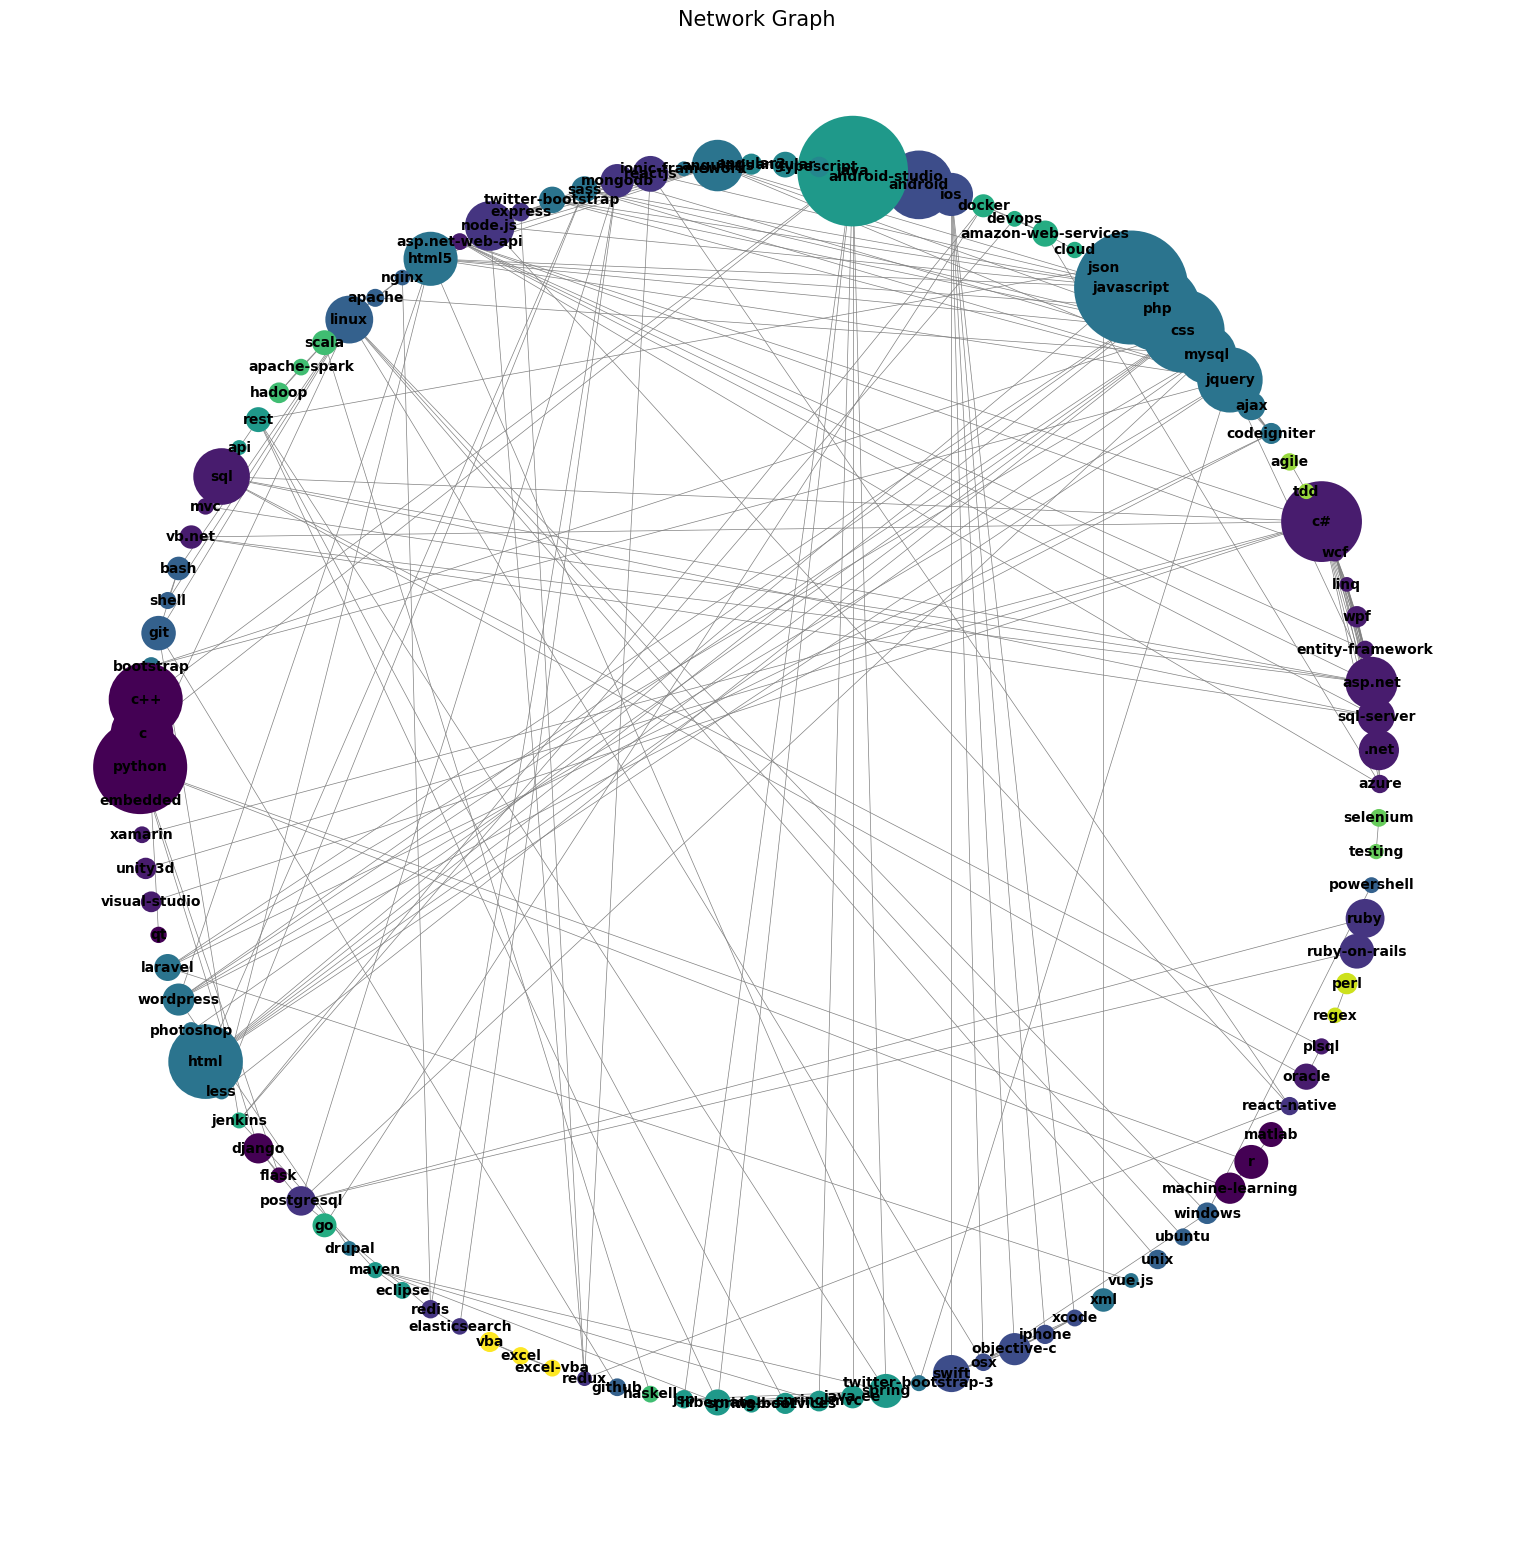

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# I assume that 'links_data' and 'nodes_data' are already defined and loaded DataFrames

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(links_data, 'source', 'target', ['value'])

# Position the nodes using a circular layout
pos = nx.circular_layout(G)

# Draw nodes: size according to the 'nodesize' and color according to the 'group'
nodes = nodes_data.set_index('name').to_dict('index')
for n in G.nodes():
    G.nodes[n]['nodesize'] = nodes[n]['nodesize']
    G.nodes[n]['group'] = nodes[n]['group']

# Convert node sizes to a format compatible for drawing
node_sizes = [nodes[n]['nodesize'] * 10 for n in G.nodes()]  # Scale for better visibility
node_colors = [nodes[n]['group'] for n in G.nodes()]

# Draw the graph
plt.figure(figsize=(15, 15))
nx.draw(G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        cmap=plt.cm.viridis,  # Changed color map
        linewidths=1.5,
        width=0.5)

plt.title("Network Graph ", fontsize=15)
plt.show()


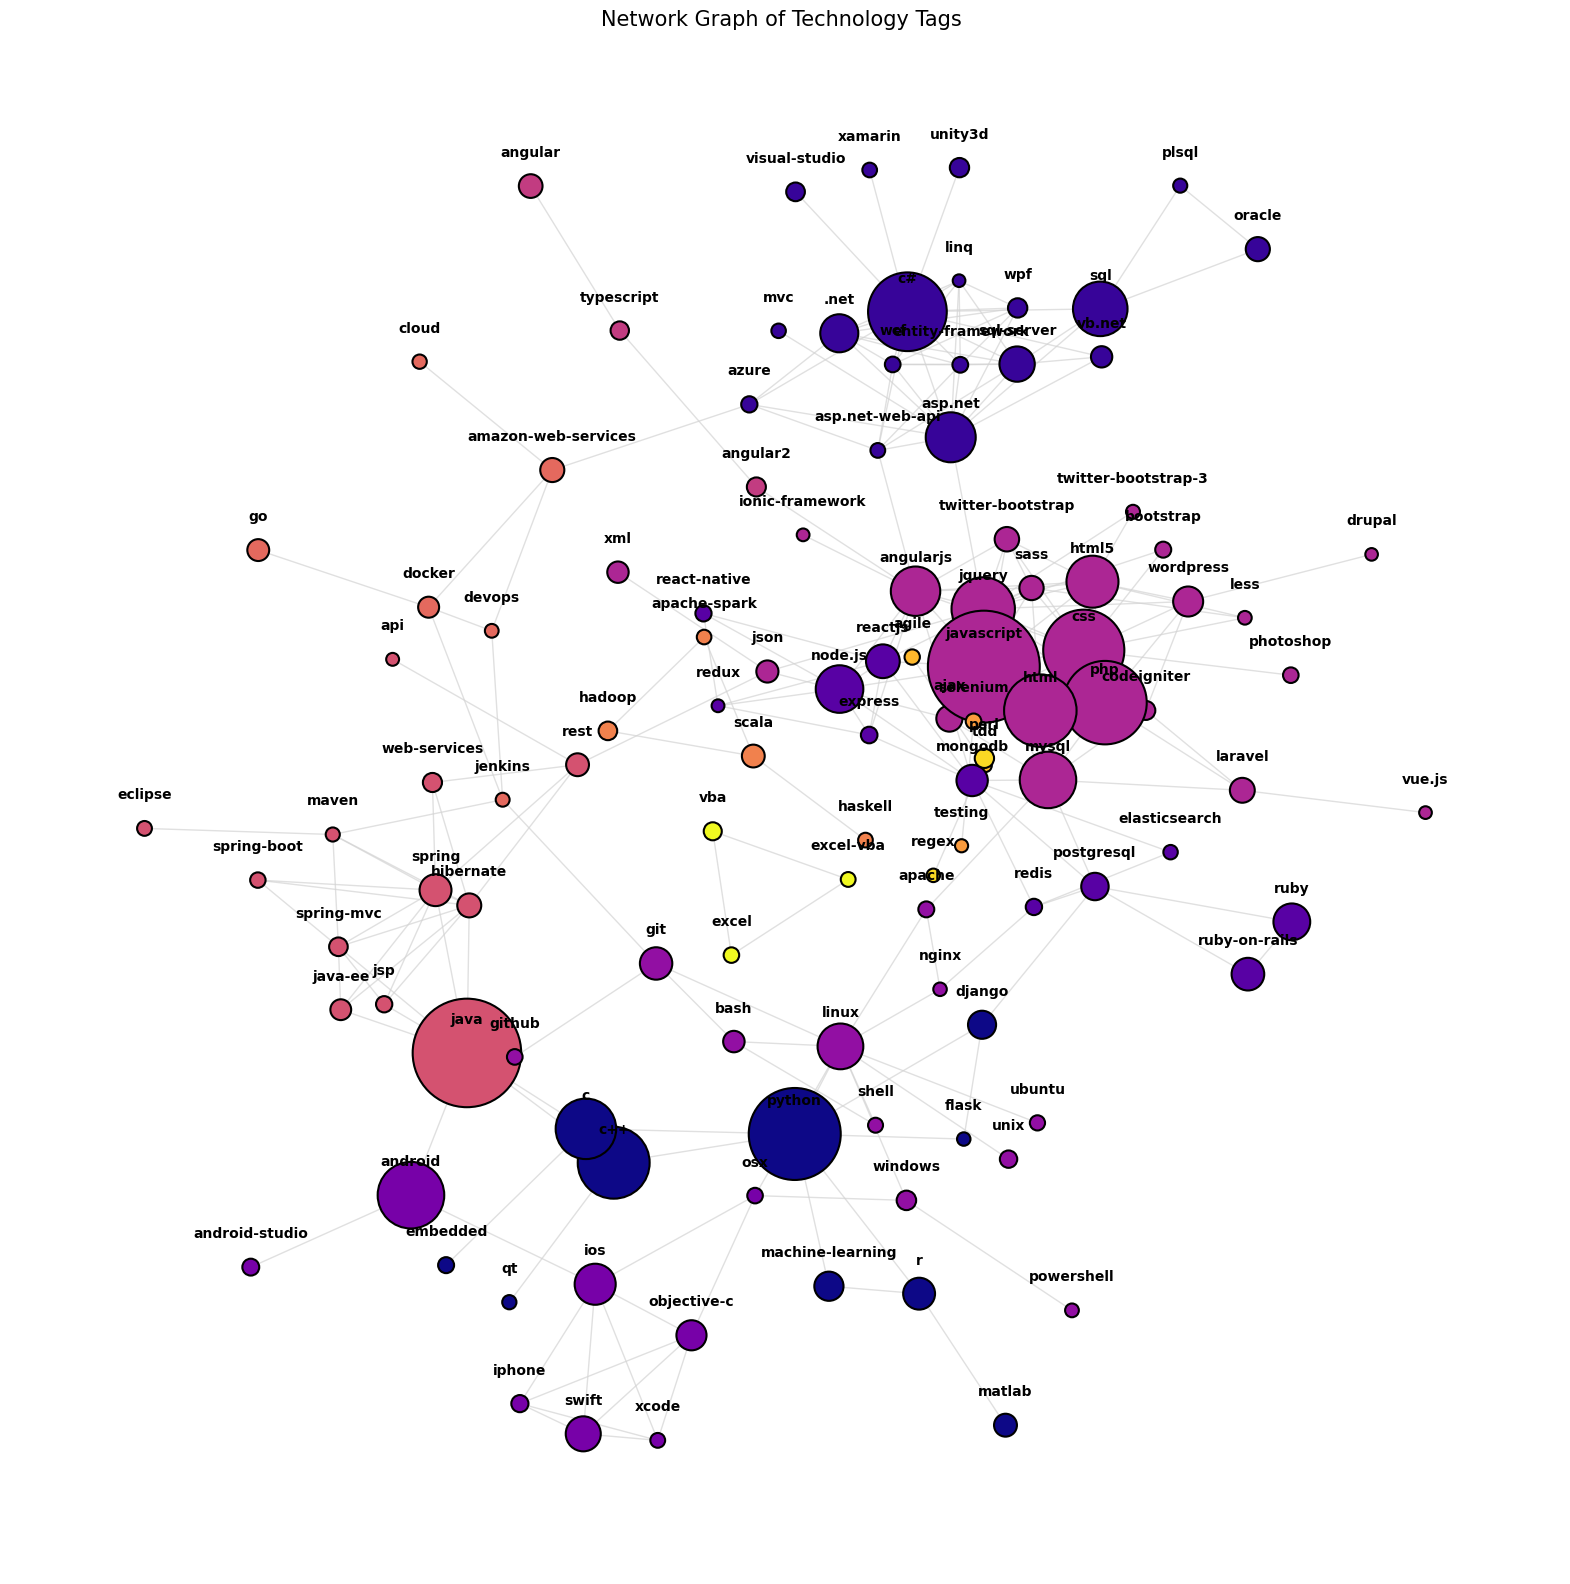

In [22]:
# Using Kamada-Kawai layout for an alternative representation
pos_kk = nx.kamada_kawai_layout(G)

# Drawing the graph with Kamada-Kawai layout
plt.figure(figsize=(20, 20))

# Draw nodes
nx.draw_networkx_nodes(G, pos_kk, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, linewidths=1.5, edgecolors='black')

# Draw edges with adjusted alpha for better visibility
nx.draw_networkx_edges(G, pos_kk, edge_color='lightgray', width=1, alpha=0.7)

# Draw labels separately with adjusted positions for readability
node_labels_pos_kk = {k: [v[0], v[1] + 0.05] for k, v in pos_kk.items()}  # Slightly raise the label positions for better readability
nx.draw_networkx_labels(G, node_labels_pos_kk, font_size=10, font_weight='bold')

plt.title("Network Graph of Technology Tags ", fontsize=15)
plt.axis('off')  # Hide axis
plt.show()


In [23]:
# Merging the nodes information into the links for a comprehensive dataset
# This gives us details about each technology in the pairs.

# Adding source node information
links_data_extended = pd.merge(links_data, nodes_data, how='left', left_on='source', right_on='name')
links_data_extended.rename(columns={'group': 'source_group', 'nodesize': 'source_nodesize'}, inplace=True)
links_data_extended.drop(columns=['name'], inplace=True)

# Adding target node information
links_data_extended = pd.merge(links_data_extended, nodes_data, how='left', left_on='target', right_on='name')
links_data_extended.rename(columns={'group': 'target_group', 'nodesize': 'target_nodesize'}, inplace=True)
links_data_extended.drop(columns=['name'], inplace=True)

# Now, we have a dataset where each record represents a pair of technologies with features describing both.
# Next, we need to generate negative samples. This involves creating combinations of technologies that do not have a link between them.
# We need to be cautious here to create a balanced dataset (not too many negative samples).

# We will find all pairs of nodes and then remove those that already exist in links_data to find the non-links.
from itertools import product

# Create all possible pairs of nodes
all_pairs = pd.DataFrame(list(product(nodes_data['name'], repeat=2)), columns=['source', 'target'])

# Remove pairs that already exist - these are our negative samples
negative_samples = all_pairs.merge(links_data, on=['source', 'target'], how='left', indicator=True).query('_merge == "left_only"')
negative_samples = negative_samples[['source', 'target']]  # Keep only necessary columns

# For the purpose of demonstration, we will limit the number of negative samples to match the number of positive samples.
negative_samples = negative_samples.sample(n=links_data.shape[0], random_state=42)

# Add the node information to negative samples similar to what was done for positive samples
negative_samples_extended = pd.merge(negative_samples, nodes_data, how='left', left_on='source', right_on='name')
negative_samples_extended.rename(columns={'group': 'source_group', 'nodesize': 'source_nodesize'}, inplace=True)
negative_samples_extended.drop(columns=['name'], inplace=True)

negative_samples_extended = pd.merge(negative_samples_extended, nodes_data, how='left', left_on='target', right_on='name')
negative_samples_extended.rename(columns={'group': 'target_group', 'nodesize': 'target_nodesize'}, inplace=True)
negative_samples_extended.drop(columns=['name'], inplace=True)

# Mark the samples as positive (existing links) or negative (non-existing links)
links_data_extended['link'] = 1  # Existing links are positive samples
negative_samples_extended['link'] = 0  # Non-existing links are negative samples

# Combine the positive and negative samples into a single dataset
full_dataset = pd.concat([links_data_extended, negative_samples_extended], ignore_index=True)

# Show the structure of the final dataset
full_dataset.head(), negative_samples_extended.head(), links_data_extended.head()


(             source target      value  source_group  source_nodesize  \
 0             azure   .net  20.933192             2            13.68   
 1        sql-server   .net  32.322524             2            64.62   
 2           asp.net   .net  48.407030             2           129.55   
 3  entity-framework   .net  24.370903             2            12.88   
 4               wpf   .net  32.350925             2            19.38   
 
    target_group  target_nodesize  link  
 0             2            75.08     1  
 1             2            75.08     1  
 2             2            75.08     1  
 3             2            75.08     1  
 4             2            75.08     1  ,
         source             target  source_group  source_nodesize  \
 0        regex             jquery            13             9.46   
 1      haskell            eclipse            10            11.18   
 2          git            mongodb             5            54.48   
 3         .net                

**Feature Engineering**

In [24]:
import networkx as nx

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(links_data, 'source', 'target', edge_attr=True)

# Function to compute network-based features
def compute_network_features(row):
    try:
        # Ensure the nodes are in the graph
        if G.has_node(row['source']) and G.has_node(row['target']):
            # Common Neighbors
            common_neigh = len(list(nx.common_neighbors(G, row['source'], row['target'])))

            # Jaccard Coefficient
            jaccard_coeff = list(nx.jaccard_coefficient(G, [(row['source'], row['target'])]))[0][2]

            # Resource Allocation Index
            res_alloc_index = list(nx.resource_allocation_index(G, [(row['source'], row['target'])]))[0][2]

            # Adamic-Adar Index
            adamic_adar_index = list(nx.adamic_adar_index(G, [(row['source'], row['target'])]))[0][2]
        else:
            # If one of the nodes (or both) is not in the graph, we assign default values
            common_neigh = 0
            jaccard_coeff = 0
            res_alloc_index = 0
            adamic_adar_index = 0

    except Exception as e:
        # In case of an error, we also assign default values
        common_neigh = 0
        jaccard_coeff = 0
        res_alloc_index = 0
        adamic_adar_index = 0

    return pd.Series([common_neigh, jaccard_coeff, res_alloc_index, adamic_adar_index],
                     index=['common_neigh', 'jaccard_coeff', 'res_alloc_index', 'adamic_adar_index'])

In [29]:
# Apply the function to each row in the dataframe
network_features = full_dataset.apply(compute_network_features, axis=1)

# Combine the features with the original dataset
full_dataset_with_features = pd.concat([full_dataset, network_features], axis=1)

full_dataset_with_features.head()

,source,target,value,source_group,source_nodesize,target_group,target_nodesize,link,common_neigh,jaccard_coeff,res_alloc_index,adamic_adar_index
0,azure,.net,20.933192,2,13.68,2,75.08,1,2.0,0.181818,0.148352,0.768794
1,sql-server,.net,32.322524,2,64.62,2,75.08,1,5.0,0.416667,0.541209,2.244489
2,asp.net,.net,48.407030,2,129.55,2,75.08,1,7.0,0.500000,0.942063,3.489183
3,entity-framework,.net,24.370903,2,12.88,2,75.08,1,6.0,0.600000,0.693987,2.776821
4,wpf,.net,32.350925,2,19.38,2,75.08,1,5.0,0.555556,0.541209,2.244489


In [30]:
from sklearn.model_selection import train_test_split

# Features for the model
feature_columns = ['source_nodesize', 'target_nodesize', 'common_neigh', 'jaccard_coeff', 'res_alloc_index', 'adamic_adar_index']
X = full_dataset_with_features[feature_columns]

# Target variable: 'link' indicates whether a link exists between the nodes
y = full_dataset_with_features['link']

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Returning the size of each dataset to verify the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((686, 6), (294, 6), (686,), (294,))

**Normalization**

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Get the importance of each feature
feature_importances = rf_clf.feature_importances_

# Now, we will select the most important features based on the importances
selector = SelectFromModel(rf_clf, prefit=True)

# Transform the dataset to only include important features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Let's see which features were selected and their respective importances
selected_features = X_train.columns[selector.get_support()]
selected_importances = feature_importances[selector.get_support()]

selected_features, selected_importances, X_train_selected.shape, X_test_selected.shape


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(Index(['target_nodesize', 'res_alloc_index', 'adamic_adar_index'], dtype='object'),
 array([0.17330406, 0.2262283 , 0.22074452]),
 (686, 3),
 (294, 3))

model building

In [40]:
!pip install tpot

from tpot import TPOTClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize TPOT classifier
tpot = TPOTClassifier(
    generations=5,  # Number of iterations to run; more means better optimization but longer runtime
    population_size=20,  # Number of individuals in the genetic programming population; larger means better optimization
    verbosity=2,  # Show information about the optimization process
    random_state=42,  # For reproducibility
    config_dict='TPOT light'  # Use a lightweight configuration for faster optimization
)

# Fit the model on the training data
tpot.fit(X_train_selected, y_train)

# Evaluate the model on test data
y_pred = tpot.predict(X_test_selected)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=1de635589c85e9255ba0eff98b61da9bc077520011a56d351a85ae9486202c9a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8833597799640325

Generation 2 - Current best internal CV score: 0.8833597799640325

Generation 3 - Current best internal CV score: 0.8833597799640325

Generation 4 - Current best internal CV score: 0.8833597799640325

Generation 5 - Current best internal CV score: 0.8833597799640325

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=2, min_samples_leaf=12, min_samples_split=7)


### **evaluation**

In [41]:
# Calculate and display the classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       147
           1       0.91      0.82      0.86       147

    accuracy                           0.87       294
   macro avg       0.87      0.87      0.87       294
weighted avg       0.87      0.87      0.87       294

Accuracy: 0.8673469387755102
